___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [8]:
BAC = web.DataReader('BAC', 'stooq', start='2006-01-01', end='2024-01-01')
C = web.DataReader('C', 'stooq', start='2006-01-01', end='2024-01-01')
GS = web.DataReader('GS', 'stooq', start='2006-01-01', end='2024-01-01')
JPM = web.DataReader('JPM', 'stooq', start='2006-01-01', end='2024-01-01')
MS = web.DataReader('MS', 'stooq', start='2006-01-01', end='2024-01-01')


# df = pd.read_pickle('all_banks')
# df.head()
BAC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-29,33.94,33.995,33.5500,33.67,28060739.0
2023-12-28,33.82,33.970,33.7700,33.88,21799559.0
2023-12-27,33.80,33.950,33.6600,33.84,24498581.0
2023-12-26,33.45,33.960,33.3715,33.86,24845437.0
2023-12-22,33.21,33.670,33.2000,33.43,37265860.0


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [11]:
ticker = ['BAC', 'C', 'GS', 'JPM', 'MS']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [12]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS], keys=ticker, axis=1)
bank_stocks

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   
...             ...      ...      ...      ...           ...      ...   
2023-12-22  33.2100  33.6700  33.2000  33.4300  3.726586e+07   50.730   
2023-12-26  33.4500  33.9600  33.3715  33.8600  2.484544e+07   50.880   
2023-12-27  33.8000  33.9500  33.6600  33.8400  2.449858e+07   51.140   
2023-12-28  33.8200  33.9700  33.7700  33.8800  2.179956e+07   51.400   
2023-12-29  33.9400  33.9950  33.5500  33.6700  2.806074e+07   51.560   

                                                      ...       JPM            \
                High      Low    Close        Volume  ...      Open      High   
Date                                                  ...                       
2006-01-03  408.6150  398.112  407.891  1.858097e+06  ...   28.7148   29.0970   
2006-01-04  406.3250  400.089  400.354  2.260921e+06  ...   28.6824   28.9428   
2006-01-05  403.6630  400.520  402.321  1.371893e+06  ...   28.5556   28.7030   
2006-01-06  404.6410  398.865  402.321  1.655812e+06  ...   28.7846   29.0125   
2006-01-09  403.3290  399.678  400.432  2.031072e+06  ...   28.7522   29.3593   
...              ...      ...      ...           ...  ...       ...       ...   
2023-12-22   51.2600   50.690   50.860  1.444056e+07  ...  167.5000  168.2300   
2023-12-26   51.5275   50.790   51.340  1.150146e+07  ...  167.4600  168.7650   
2023-12-27   51.5800   50.930   51.460  9.901341e+06  ...  167.8400  169.4700   
2023-12-28   51.7950   51.400   51.520  1.021845e+07  ...  169.3500  170.6600   
2023-12-29   51.6050   51.215   51.440  1.314941e+07  ...  170.0000  170.6900   

                                                   MS                    \
                 Low     Close        Volume     Open     High      Low   
Date                                                                      
2006-01-03   28.3376   28.9771  1.780695e+07  37.4934  38.3558  37.2060   
2006-01-04   28.4201   28.5626  1.871252e+07  38.4971  38.8778  38.2675   
2006-01-05   28.4810   28.6520  1.118271e+07  38.2675  38.4264  38.0448   
2006-01-06   28.5164   28.8543  1.104151e+07  38.5432  38.5922  38.0703   
2006-01-09   28.7522   29.3229  2.298942e+07  38.4470  38.8846  38.4412   
...              ...       ...           ...      ...      ...      ...   
2023-12-22  167.2300  167.4000  6.576322e+06  92.9000  93.6600  92.2324   
2023-12-26  167.1800  168.3900  4.683605e+06  92.6100  93.0200  92.3700   
2023-12-27  167.5800  169.4000  6.428643e+06  92.6900  93.6900  92.4004   
2023-12-28  168.9950  170.3000  6.320129e+06  93.3100  93.9501  93.2400   
2023-12-29  169.6300  170.1000  6.435102e+06  93.4900  93.7700  93.0600   

                                   
              Close        Volume  
Date                               
2006-01-03  38.2361  6.806387e+06  
2006-01-04  38.2675  1.009857e+07  
2006-01-05  38.3715  7.313990e+06  
2006-01-06  38.4108  8.721337e+06  
2006-01-09  38.8120  5.246244e+06  
...             ...           ...  
2023-12-22  92.4100  5.800929e+06  
2023-12-26  92.8400  2.726286e+06  
2023-12-27  93.6600  4.073222e+06  
2023-12-28  93.6400  4.089529e+06  
2023-12-29  93.2500  4.772283e+06  

[4529 rows x 25 columns]

** Set the column name levels (this is filled out for you):**

In [13]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [39]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...      JPM           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  28.7148  29.0970   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  28.6824  28.9428   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  28.5556  28.7030   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  28.7846  29.0125   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  28.7522  29.3593   

Bank Ticker                                       MS                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   28.3376  28.9771  1.780695e+07  37.4934  38.3558  37.2060   
2006-01-04   28.4201  28.5626  1.871252e+07  38.4971  38.8778  38.2675   
2006-01-05   28.4810  28.6520  1.118271e+07  38.2675  38.4264  38.0448   
2006-01-06   28.5164  28.8543  1.104151e+07  38.5432  38.5922  38.0703   
2006-01-09   28.7522  29.3229  2.298942e+07  38.4470  38.8846  38.4412   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   38.2361  6.806387e+06  
2006-01-04   38.2675  1.009857e+07  
2006-01-05   38.3715  7.313990e+06  
2006-01-06   38.4108  8.721337e+06  
2006-01-09   38.8120  5.246244e+06  

[5 rows x 25 columns]

** Check the head of the bank_stocks dataframe.**

In [12]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...      JPM           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  28.7148  29.0970   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  28.6824  28.9428   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  28.5556  28.7030   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  28.7846  29.0125   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  28.7522  29.3593   

Bank Ticker                                       MS                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   28.3376  28.9771  1.780695e+07  37.4934  38.3558  37.2060   
2006-01-04   28.4201  28.5626  1.871252e+07  38.4971  38.8778  38.2675   
2006-01-05   28.4810  28.6520  1.118271e+07  38.2675  38.4264  38.0448   
2006-01-06   28.5164  28.8543  1.104151e+07  38.5432  38.5922  38.0703   
2006-01-09   28.7522  29.3229  2.298942e+07  38.4470  38.8846  38.4412   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   38.2361  6.806387e+06  
2006-01-04   38.2675  1.009857e+07  
2006-01-05   38.3715  7.313990e+06  
2006-01-06   38.4108  8.721337e+06  
2006-01-09   38.8120  5.246244e+06  

[5 rows x 25 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [6]:
for stock in ticker:
    print(stock, bank_stocks[stock]['Close'].max())

BAC 48.2567
C 466.812
GS 410.793
JPM 170.3
MS 105.761


** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [7]:
returns = pd.DataFrame()

In [8]:
close_col = bank_stocks.xs('Close', axis=1, level=1)
close_col.pct_change()

for stock in ticker:
    returns[stock, 'Return'] = bank_stocks[stock]['Close'].pct_change()
    
returns

,"(BAC, Return)","(C, Return)","(GS, Return)","(JPM, Return)","(MS, Return)"
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445
...,...,...,...,...,...
2023-12-22,0.006928,0.005138,0.000210,-0.000597,-0.002375
2023-12-26,0.012863,0.009438,0.002522,0.005914,0.004653
2023-12-27,-0.000591,0.002337,0.007521,0.005998,0.008832


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

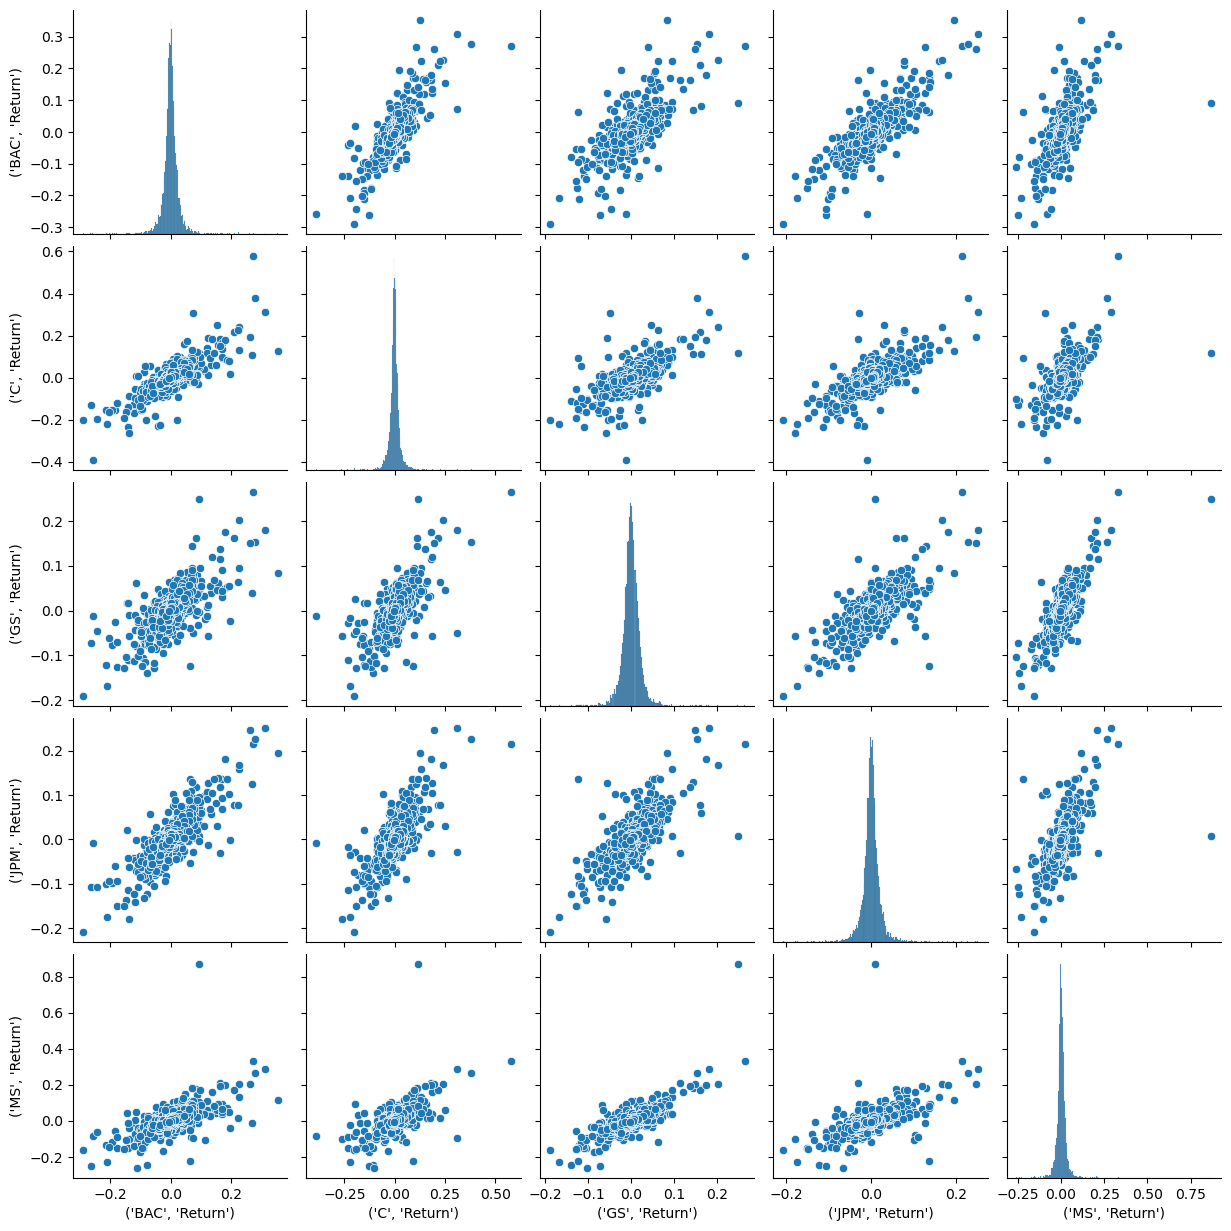

In [9]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [10]:
# Returns the index of the min, idxmax could be used to return the max 
returns.idxmin()
# returns.idxmax()

(BAC, Return)   2009-01-20
(C, Return)     2009-02-27
(GS, Return)    2009-01-20
(JPM, Return)   2009-01-20
(MS, Return)    2008-10-09
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [11]:
# Higher standard deviations means the stock goes up and down alot
returns.std()

(BAC, Return)    0.030530
(C, Return)      0.032202
(GS, Return)     0.022700
(JPM, Return)    0.023821
(MS, Return)     0.031254
dtype: float64

In [56]:
# returns.loc["2015"].std()
returns.loc['2015-01-01' : '2015-12-31'].std()


(BAC, Return)    0.016149
(C, Return)      0.015280
(GS, Return)     0.014028
(JPM, Return)    0.013964
(MS, Return)     0.016006
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

<Axes: xlabel="('MS', 'Return')", ylabel='Count'>

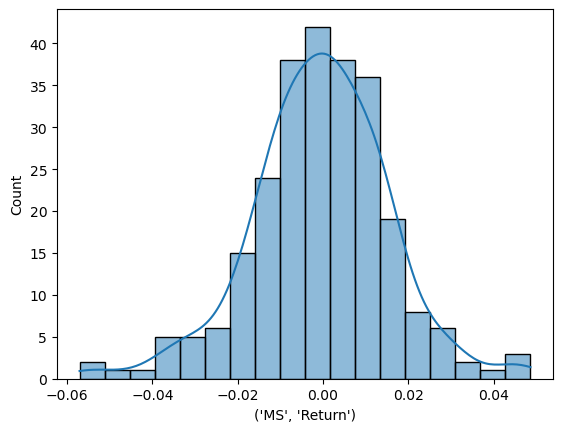

In [91]:
ms_returns = returns.loc['2015-01-01' : '2015-12-31']
sns.histplot(data=ms_returns[('MS', 'Return')], kde=True)


/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



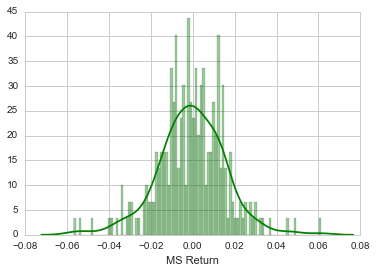

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

<Axes: xlabel="('C', 'Return')", ylabel='Count'>

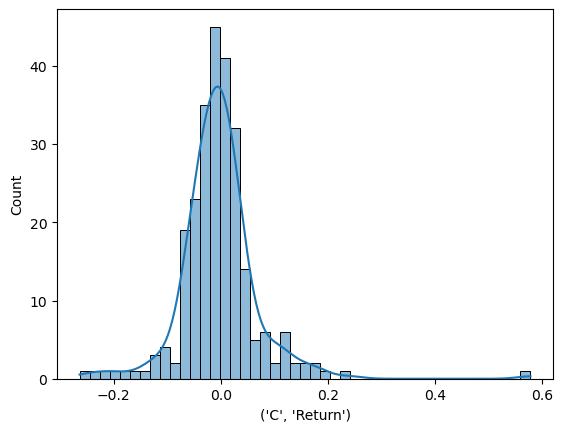

In [95]:
returns_c = returns.loc['2008-01-01': '2008-12-31']
returns_2008 = returns_c[('C', 'Return')]
sns.histplot(data=returns_2008, kde=True)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [20]:
# Why is level Stock Info ??
close_price = bank_stocks.xs('Close', axis=1, level="Stock Info")
bac_close_price = close_price['BAC']
# sns.lineplot(bank_stocks)

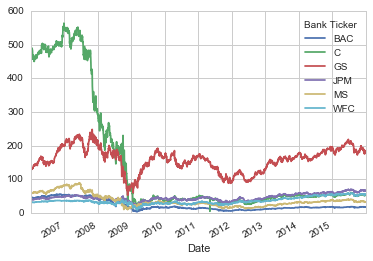

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<Axes: xlabel='Date'>

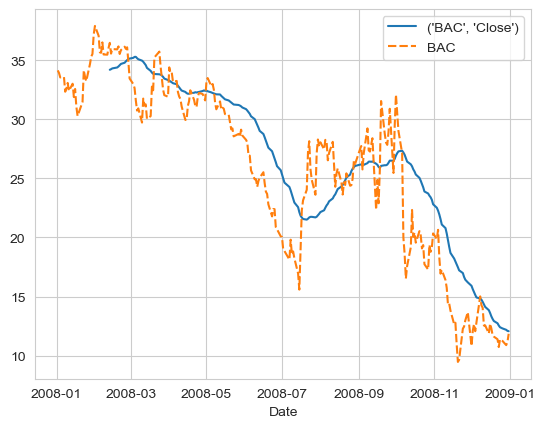

In [21]:
# close_price.head()
rolling_30 = bank_stocks.loc["2008-01-01":"2008-12-31"]
avg = rolling_30['BAC', 'Close'].rolling(window=30).mean()

bac_close_price
display_df = pd.concat([avg, bac_close_price], axis=1, join="inner")
sns.lineplot(display_df)

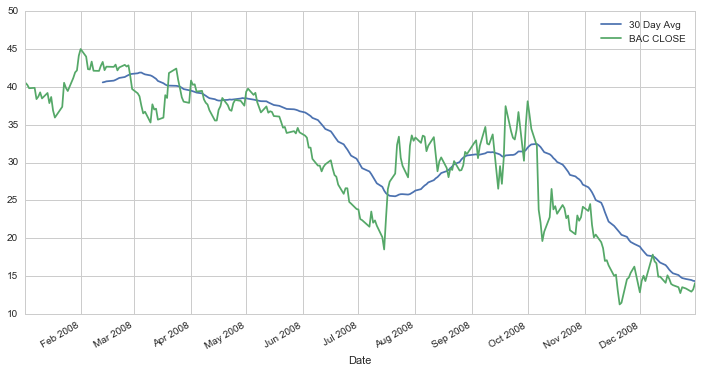

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

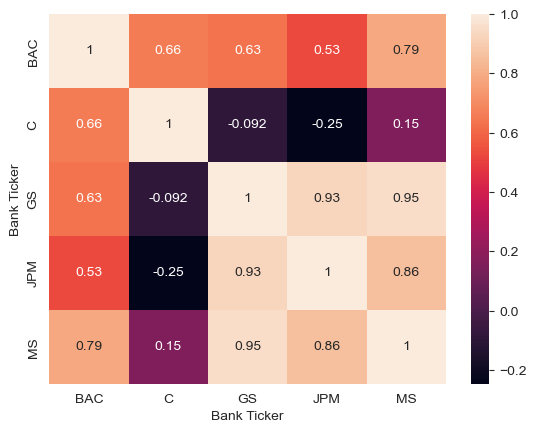

In [22]:
sns.heatmap(close_price.corr(numeric_only=True), annot=True)

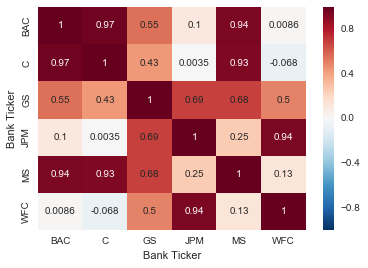

** Optional: Use seaborn's clustermap to cluster the correlations together:**

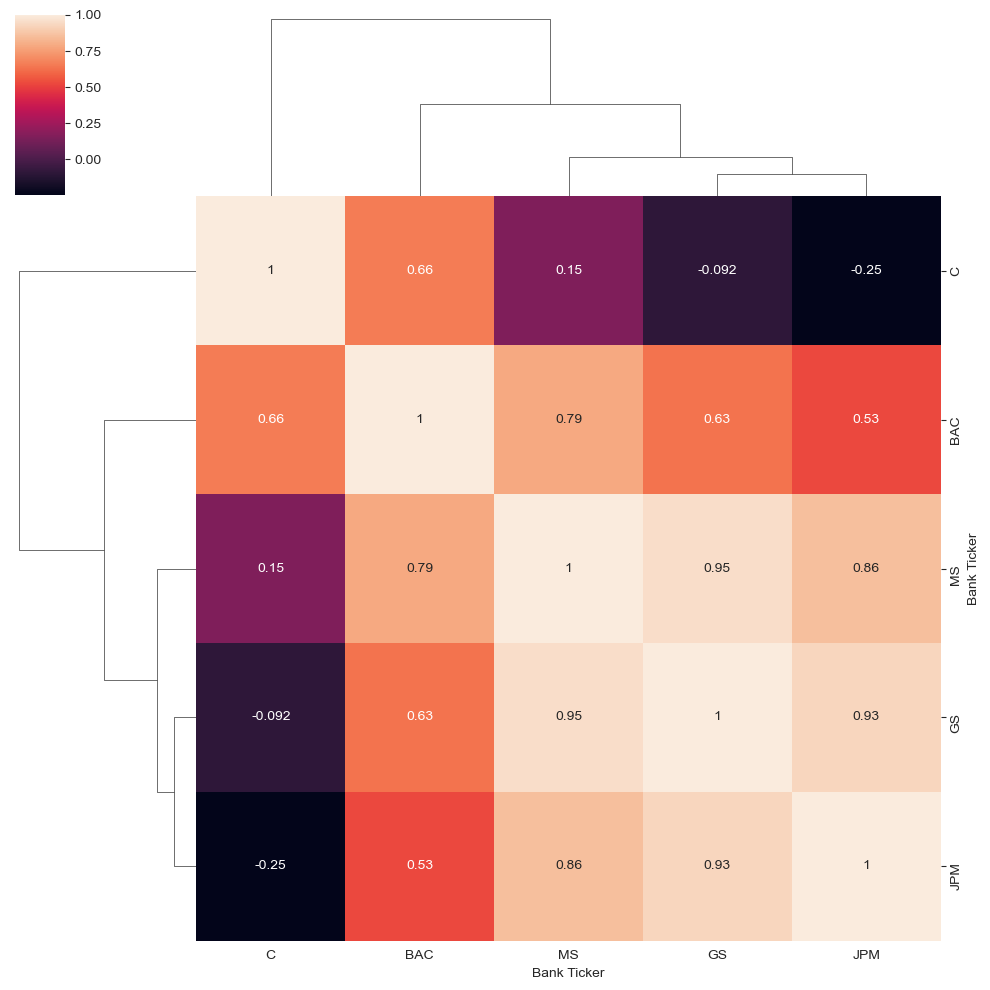

In [23]:
sns.clustermap(close_price.corr(numeric_only=True), annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [29]:
bac_2015 = BAC[['Open','High','Low','Close']].sort_index().loc["2015-01-01":"2015-12-31"]
bac_2015.iplot(kind="candle")

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [30]:
sm_2015_ms = MS.sort_index().loc["2015-01-01":"2015-12-31"]
sm_2015_ms['Close'].ta_plot(study='sma',periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [33]:
bac_2015 = BAC.sort_index().loc["2015-01-01":"2015-12-31"]
bac_2015['Close'].rolling(window=30).mean().ta_plot(study='boll',periods=13)

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.